<h2>Task Classification Using Machine Learning Algorithms</h2>
<hr>

<style>
    h3{
        color: rgb(86, 180, 252);
        margin: 0;
    }
</style>
<h3>Importing the libraries<h3>

In [19]:
import string
import pandas as pd
import nltk
import os
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_recall_fscore_support
from tabulate import tabulate
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder



<style>
    h3{
        color: rgb(86, 180, 252);
        margin: 0;
    }
</style>
<h3>Importing dataset</h3>

In [2]:

dataset = pd.read_csv('task_dataset.csv')[['input', 'label']]

X = dataset.iloc[:, 0].values.astype('U')
y = dataset.iloc[:, 1].values

<style>
    h3{
        color: rgb(86, 180, 252);
        margin: 0;
    }
</style>
<h3>Some insights about the dataset </h3>

<style>
    h3{
        color: rgb(86, 180, 252);
        margin: 0;
    }
</style>
<h3>Define a function for text preprocessing</h3>

In [3]:
def text_preprocessing(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Word tokenization
    text = word_tokenize(text)

    # Remove stop words
    stop_words_en = stopwords.words('english')
    text = [word for word in text if word not in stop_words_en]

    # Stemming (we will not use it in the project)
    # from nltk.stem import PorterStemmer
    # from nltk.stem.isri import ISRIStemmer
    # stemmer_en = PorterStemmer()
    # stemmer_ar = ISRIStemmer()
    # text = [stemmer_en.stem(stemmer_ar.stem(word)) for word in text]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word, pos='v') for word in text]  # consider all words as verbs
    text = [lemmatizer.lemmatize(word, pos='a') for word in text]  # consider all words as adjectives

    # pos_tags = nltk.pos_tag(text)
    # lemmatizer = WordNetLemmatizer()
    # text = [
    #     lemmatizer.lemmatize(word, pos=pos[0].lower()) if pos[0].lower()
    #     in ['a', 'r', 'n', 'v'] else lemmatizer.lemmatize(word)
    #     for word, pos in pos_tags
    # ]
    
    # Concatenate tokens
    text = ' '.join(text)

    return text

<style>
    h3{
        color: rgb(86, 180, 252);
        margin: 0;
    }
</style>
<h3>Make text preprocessing</h3>

In [4]:
processed_X = []
processed_y = []

# Iterate over each sample in X and y
for text, label in zip(X, y):
    processed_text = text_preprocessing(text)
    # Check if the processed text is not already in processed_X
    if processed_text not in processed_X:
        # If not, append the processed text to processed_X and the corresponding label to processed_y
        processed_X.append(processed_text)
        processed_y.append(label)

# Convert the lists to numpy arrays
processed_X = np.array(processed_X)
processed_y = np.array(processed_y)

In [5]:
processed_X

array(['currency wallet', 'tell currency palm', 'identify money hand',
       'whats denomination bill im hold', 'tell type currency hand',
       'describe currency note im touch', 'recognize bill im feel',
       'money', 'detect currency possession', 'identify banknote im hold',
       'whats front', 'describe scene front', 'see surround',
       'tell environment front', 'describe whats happen around',
       'whats visible position', 'give description current surround',
       'object field view', 'whats around', 'far door',
       'determine distance door', 'whats depth door',
       'measure distance door', 'estimate gap door',
       'calculate distance door', 'much space door', 'find distance door',
       'whats distance door', 'read text front', 'read', 'translate text',
       'say', 'extract text image', 'whats write paper',
       'read word document', 'decode text image', 'convert image text',
       'translate text english', 'convert english', 'change english',
       '

In [6]:
# Show the column names
print(f"Columns: {', '.join(dataset.columns)}", end='\n\n')

# Print the first 5 samples as a table
print(tabulate(dataset.head(), headers='keys', tablefmt='psql'))


Columns: input, label

+----+--------------------------------------------------+----------------------+
|    | input                                            | label                |
|----+--------------------------------------------------+----------------------|
|  0 | What currency is in my wallet?                   | currency recognition |
|  1 | Can you tell me the currency in my palm?         | currency recognition |
|  2 | Identify the money in my hand.                   | currency recognition |
|  3 | What's the denomination of the bill I'm holding? | currency recognition |
|  4 | Tell me the type of currency in my hand.         | currency recognition |
+----+--------------------------------------------------+----------------------+


In [20]:
label_encoder = LabelEncoder()
encoded_y_train = label_encoder.fit_transform(processed_y)



In [40]:
# Get the mapping of original labels to encoded values
label_mapping = {label: encoded_label for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

# Now label_mapping contains the mapping of original labels to their encoded values
print(label_mapping)

{'color recognition': 0, 'currency recognition': 1, 'depth estimation': 2, 'ocr': 3, 'scene description': 4, 'translation': 5}


In [41]:
# Get the original labels
original_labels = label_encoder.classes_

# Get the corresponding encoded values
encoded_values = label_encoder.transform(original_labels)

# Now original_labels contains the original labels and encoded_values contains their corresponding encoded values
print("Original Labels:", original_labels)
print("Encoded Values:", encoded_values)

Original Labels: ['color recognition' 'currency recognition' 'depth estimation' 'ocr'
 'scene description' 'translation']
Encoded Values: [0 1 2 3 4 5]


<style>
    h3{
        color: rgb(86, 180, 252);
        margin: 0;
    }
</style>
<h3>Create a vectorizer</h3>

In [33]:
if not os.path.exists('models'):
    os.makedirs('models')

vectorizer = CountVectorizer(max_features=10000)
vectorizer.fit(processed_X)
joblib.dump(vectorizer, 'models/vectorizer.joblib')

# Transform text to vectors
processed_X = vectorizer.transform(processed_X).toarray()

# vectorizer = CountVectorizer(ngram_range=(2),max_features=10000)
# vectorizer.fit(processed_X)
# joblib.dump(vectorizer, 'models/vectorizer.joblib')

# # Transform text to vectors
# X = vectorizer.transform(processed_X).toarray()

# vectorizer = TfidfVectorizer()
# vectorizer.fit(processed_X)
# joblib.dump(vectorizer, 'models/vectorizer.joblib')

# # Transform text to vectors
# X = vectorizer.transform(processed_X).toarray()

<style>
    h3{
        color: rgb(86, 180, 252);
        margin: 0;
    }
</style>
<h3>Prepare train and test data</h3>

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_X, encoded_y_train, test_size=0.2, random_state=42)

In [35]:
# Reshape X_train and X_test if they are 1-dimensional arrays
if len(X_train.shape) == 1:
    X_train = X_train.reshape(-1, 1)
if len(X_test.shape) == 1:
    X_test = X_test.reshape(-1, 1)

In [37]:
X_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<style>
    h3{
        color: rgb(255, 102, 0);
        margin: 0;
    }
</style>
<h3>First model: Naive Bayes (MultinomialNB)</h3>

In [38]:
# Train the model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

MultinomialNB()

<style>
    h3{
        color: rgb(86, 180, 252);
        margin: 0;
    }
</style>
<h3>Test the model</h3>

In [42]:
# Test the model
NB_y_pred = NB_model.predict(X_test)

# Evaluate the accuracy of the classifier
NB_accuracy = accuracy_score(y_test, NB_y_pred)
print('Accuracy:', NB_accuracy)

# Print the confusion matrix of the classifier
conf_matrix = confusion_matrix(y_test, NB_y_pred)
print('Confusion matrix:')
index = original_labels
print(pd.DataFrame(conf_matrix,index=index,columns=index))

# Calculate precision, recall, and F1-score of the classifier
precision, recall, f1, _ = precision_recall_fscore_support(y_test, NB_y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.98
Confusion matrix:
                      color recognition  currency recognition  \
color recognition                    13                     0   
currency recognition                  0                     7   
depth estimation                      0                     0   
ocr                                   0                     0   
scene description                     1                     0   
translation                           0                     0   

                      depth estimation  ocr  scene description  translation  
color recognition                    0    0                  0            0  
currency recognition                 0    0                  0            0  
depth estimation                    13    0                  0            0  
ocr                                  0    4                  0            0  
scene description                    0    0                  9            0  
translation                          0    0

<style>
    h3{
        color: rgb(255, 102, 0);
        margin: 0;
    }
</style>
<h3>Second model: Random Forest</h3>

In [43]:
# Train the model
RF_model = RandomForestClassifier(n_estimators=100,
                                  max_depth=10,
                                  random_state=42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

<style>
    h3{
        color: rgb(86, 180, 252);
        margin: 0;
    }
</style>
<h3>Test the model</h3>

In [45]:
# Test the model
RF_y_pred = RF_model.predict(X_test)

# Evaluate the accuracy of the classifier
RF_accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', RF_accuracy)

# Print the confusion matrix of the classifier
conf_matrix = confusion_matrix(y_test, RF_y_pred)
print('Confusion matrix:')
index = original_labels
print(pd.DataFrame(conf_matrix,index=index,columns=index))

# Calculate precision, recall, and F1-score of the classifier
precision, recall, f1, _ = precision_recall_fscore_support(y_test, RF_y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.96
Confusion matrix:
                      color recognition  currency recognition  \
color recognition                    13                     0   
currency recognition                  0                     6   
depth estimation                      0                     0   
ocr                                   0                     0   
scene description                     0                     0   
translation                           0                     0   

                      depth estimation  ocr  scene description  translation  
color recognition                    0    0                  0            0  
currency recognition                 0    0                  1            0  
depth estimation                    13    0                  0            0  
ocr                                  0    4                  0            0  
scene description                    0    0                 10            0  
translation                          0    1

<style>
    h3{
        color: rgb(255, 102, 0);
        margin: 0;
    }
</style>
<h3>Third model: K-Nearest Neighbors</h3>

In [46]:
# Train the model
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

<style>
    h3{
        color: rgb(86, 180, 252);
        margin: 0;
    }
</style>
<h3>Test the model</h3>

In [47]:
# Test the model
KNN_y_pred = KNN_model.predict(X_test)

# Evaluate the accuracy of the classifier
KNN_accuracy = accuracy_score(y_test, KNN_y_pred)
print('Accuracy:', KNN_accuracy)

# Print the confusion matrix of the classifier
conf_matrix = confusion_matrix(y_test, KNN_y_pred)
print('Confusion matrix:')
index = original_labels
print(pd.DataFrame(conf_matrix,index=index,columns=index))

# Calculate precision, recall, and F1-score of the classifier
precision, recall, f1, _ = precision_recall_fscore_support(y_test, KNN_y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.94
Confusion matrix:
                      color recognition  currency recognition  \
color recognition                    13                     0   
currency recognition                  0                     7   
depth estimation                      0                     0   
ocr                                   0                     0   
scene description                     1                     0   
translation                           0                     0   

                      depth estimation  ocr  scene description  translation  
color recognition                    0    0                  0            0  
currency recognition                 0    0                  0            0  
depth estimation                    13    0                  0            0  
ocr                                  0    3                  0            1  
scene description                    0    1                  8            0  
translation                          0    0

<style>
    h3{
        color: rgb(255, 102, 0);
        margin: 0;
    }
</style>
<h3>Fourth model: Support Vector Machine</h3>

In [48]:
# Train the model
SVM_model = SVC(kernel='linear', C=1, random_state=42)
SVM_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

<style>
    h3{
        color: rgb(86, 180, 252);
        margin: 0;
    }
</style>
<h3>Test the model</h3>

In [49]:
# Test the model
SVM_y_pred = SVM_model.predict(X_test)

# Evaluate the accuracy of the classifier
SVM_accuracy = accuracy_score(y_test, SVM_y_pred)
print('Accuracy:', SVM_accuracy)

# Print the confusion matrix of the classifier
conf_matrix = confusion_matrix(y_test, SVM_y_pred)
print('Confusion matrix:')
index = original_labels
print(pd.DataFrame(conf_matrix,index=index,columns=index))

# Calculate precision, recall, and F1-score of the classifier
precision, recall, f1, _ = precision_recall_fscore_support(y_test, SVM_y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.98
Confusion matrix:
                      color recognition  currency recognition  \
color recognition                    13                     0   
currency recognition                  0                     7   
depth estimation                      0                     0   
ocr                                   0                     0   
scene description                     0                     0   
translation                           0                     0   

                      depth estimation  ocr  scene description  translation  
color recognition                    0    0                  0            0  
currency recognition                 0    0                  0            0  
depth estimation                    13    0                  0            0  
ocr                                  0    4                  0            0  
scene description                    0    0                 10            0  
translation                          0    1

<style>
    h3{
        color: rgb(255, 102, 0);
        margin: 0;
    }
</style>
<h3>Fifth model: Logistic Regression</h3>

In [50]:
# Train the model
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

<style>
    h3{
        color: rgb(86, 180, 252);
        margin: 0;
    }
</style>
<h3>Test the model</h3>

In [51]:
# Test the model
LR_y_pred = LR_model.predict(X_test)

# Evaluate the accuracy of the classifier
LR_accuracy = accuracy_score(y_test, LR_y_pred)
print('Accuracy:', LR_accuracy)

# Print the confusion matrix of the classifier
conf_matrix = confusion_matrix(y_test, LR_y_pred)
print('Confusion matrix:')
index = original_labels
print(pd.DataFrame(conf_matrix,index=index,columns=index))

# Calculate precision, recall, and F1-score of the classifier
precision, recall, f1, _ = precision_recall_fscore_support(y_test, LR_y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.98
Confusion matrix:
                      color recognition  currency recognition  \
color recognition                    13                     0   
currency recognition                  0                     7   
depth estimation                      0                     0   
ocr                                   0                     0   
scene description                     0                     0   
translation                           0                     0   

                      depth estimation  ocr  scene description  translation  
color recognition                    0    0                  0            0  
currency recognition                 0    0                  0            0  
depth estimation                    13    0                  0            0  
ocr                                  0    4                  0            0  
scene description                    0    0                 10            0  
translation                          0    1

<style>
    h3{
        color: rgb(0, 255, 0);
        margin: 0;
    }
</style>
<h3>Compare between models</h3>

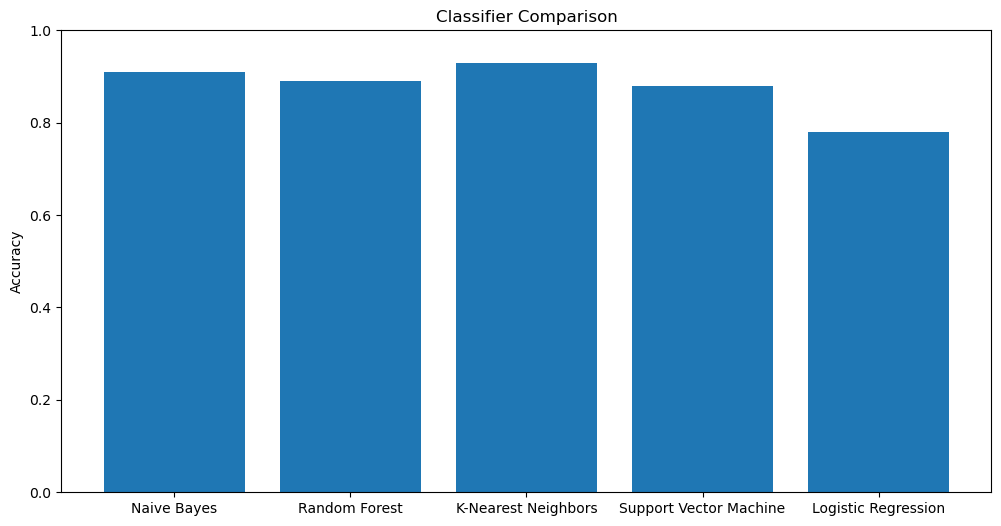

In [52]:
# Create a bar plot to compare the accuracy scores
labels = [
    'Naive Bayes', 'Random Forest', 'K-Nearest Neighbors',
    'Support Vector Machine', 'Logistic Regression'
]

accuracy_scores = [0.91, 0.89, 0.93, 0.88, 0.78]
# accuracy_scores = [NB_accuracy, RF_accuracy, KNN_accuracy, SVM_accuracy, LR_accuracy]

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(labels, accuracy_scores)
ax.set_ylim(0, 1)
ax.set_ylabel('Accuracy')
ax.set_title('Classifier Comparison')
plt.show()

save the best model

In [ ]:
# Save the trained model
final_model = NB_model
joblib.dump(final_model, 'models/sentimental-analysis-model.joblib')